In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test)  = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

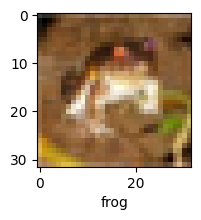

In [17]:
plot_sample(X_train, y_train, 0)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape = (32, 32, 3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 29s 18ms/step - loss: 1.8126 - accuracy: 0.3532
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6235 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5401 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4804 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4315 - accuracy: 0.4986


In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),
        
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')    
    ])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4700 - accuracy: 0.4719
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1246 - accuracy: 0.6060
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9925 - accuracy: 0.6542
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9038 - accuracy: 0.6826
Epoch 5/5
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8359 - accuracy: 0.7104


In [24]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9417 - accuracy: 0.6744


[0.9417180418968201, 0.6743999719619751]

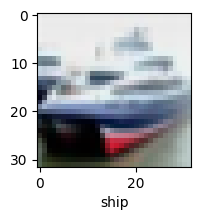

In [25]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.11020226e-02, 5.89825097e-04, 8.07509478e-03, 6.39259219e-01,
        3.09942942e-03, 2.26880401e-01, 2.19090050e-03, 1.85443857e-03,
        1.05255604e-01, 1.69308193e-03],
       [3.96399945e-03, 1.33141086e-01, 1.33034728e-05, 2.42617225e-05,
        6.80574067e-06, 1.36206870e-06, 1.46893774e-06, 1.43869357e-07,
        8.57622683e-01, 5.22483792e-03],
       [3.38195525e-02, 4.41312641e-02, 1.69871224e-03, 5.80453314e-03,
        2.25692661e-03, 3.28705326e-04, 5.76868595e-04, 6.69308429e-05,
        8.99146020e-01, 1.21704973e-02],
       [5.61425149e-01, 1.12937234e-01, 2.26270519e-02, 6.08213188e-04,
        3.30317654e-02, 1.80513729e-04, 1.04739680e-04, 2.89929425e-03,
        2.63676196e-01, 2.50979699e-03],
       [1.93319174e-05, 1.46921229e-04, 5.44940531e-02, 1.26060098e-01,
        7.19286621e-01, 1.89921428e-02, 8.03292468e-02, 5.38071792e-04,
        1.09513174e-04, 2.39838191e-05]], dtype=float32)

In [28]:
y_classes = [np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [32]:
classes[y_classes[4]]

'deer'

: 